# Importing the Libraries

In [31]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
import pickle
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Importing the cleaned dataset

In [2]:
import pandas as pd
rev_train = pd.read_csv('pricessed.csv')

In [5]:
np.random.seed(2018)

In [6]:
#To download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#Taking stopwords of English language
stop_words = stopwords.words('english')

In [8]:
#Functionn to remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

##### Gensim’s Phrases class allows you to group related phrases into one token for LDA. 

In [9]:
# function to generate bi grams
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

##### gensim’s Dictionary class will output the word frequency count of each word for each blog content. 

In [10]:
def get_corpus(df):
    df['content'] = df['content'].replace('\n'," ")    # to remove escape seuences in content
    df['content'] = df['content'].replace('\t'," ")    # to remove escape seuences in content
    words = []
    ps = PorterStemmer()
    for i in range(df.shape[0]):                            # extracting each content row wise
        rev = list(df.content[i].split())                  # making list of words of each content
        rev = [ps.stem(word) for word in rev]               # Stemming the each word                          
        words.append(rev)                               # appending the list of content after text mining
    
    words = remove_stopwords(words)                    # removing stopwords
    bigram_mod = bigrams(words)                         #
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [11]:
train_corpus, train_id2word, bigram_train = get_corpus(rev_train)

In [13]:
#printing sparse matrix for first content
print(train_corpus[0])

[(0, 3), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 4), (12, 1), (13, 1), (14, 33), (15, 2), (16, 6), (17, 2), (18, 1), (19, 1), (20, 2), (21, 4), (22, 1), (23, 2), (24, 2), (25, 2), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 4), (32, 6), (33, 4), (34, 1), (35, 4), (36, 1), (37, 2), (38, 1), (39, 16), (40, 1), (41, 2), (42, 16), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 6), (49, 1), (50, 4), (51, 1), (52, 3), (53, 2), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 5), (66, 1), (67, 1), (68, 2), (69, 1), (70, 2), (71, 1), (72, 2), (73, 1), (74, 2), (75, 10), (76, 1), (77, 1), (78, 1), (79, 3), (80, 2), (81, 5), (82, 1), (83, 7), (84, 2), (85, 3), (86, 3), (87, 4), (88, 1), (89, 5), (90, 1), (91, 3), (92, 1), (93, 3), (94, 1), (95, 3), (96, 1), (97, 1), (98, 4), (99, 1), (100, 1), (101, 4), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110,

In [20]:
# Dictionary corresponding to each unique word
train_id2word

In [16]:
# words after bigrams
bigram_train[0]

['intellig',
 'excit',
 'real_world',
 'applic',
 'ai',
 'retail',
 'artifici_intellig',
 'convers',
 'ai',
 'listicl',
 'retail',
 'excit',
 'real_world',
 'applic',
 'ai',
 'retail',
 'sneha',
 'jain',
 'overview_introduct',
 'core',
 'retail',
 'experi',
 'chang',
 'much',
 'recent',
 'year',
 'go',
 'store',
 'onlin',
 'portal',
 'brows',
 'avail',
 'option',
 'tri',
 'make',
 'purchas',
 'way',
 'transit',
 'one',
 'stage',
 'thi',
 'experi',
 'next',
 'well',
 'disrupt',
 'happen',
 'thank',
 'artifici_intellig',
 'ai',
 'ha',
 'complet',
 'transform',
 'way',
 'handl',
 'retail',
 'experi',
 'custom',
 'perspect',
 'well',
 'busi',
 'standpoint',
 'artifici_intellig',
 'creat',
 'opportun',
 'retail',
 'bridg_gap',
 'virtual',
 'physic',
 'sale',
 'channel',
 'brand',
 'progress',
 'use',
 'artifici_intellig',
 'reduc',
 'cost',
 'improv',
 'effici',
 'achiev',
 'oper',
 'agil',
 'increas',
 'speed',
 'decis_make',
 'retail',
 'world',
 'accord',
 'ibm',
 'recent',
 'studi',
 'a

In [22]:
# LDA Training
lda_train = gensim.models.ldamulticore.LdaMulticore(
                        corpus=train_corpus,
                        num_topics=31,
                        id2word=train_id2word,
                        chunksize=100,
                        workers=7, # Num. Processing Cores - 1
                        passes=50,
                        eval_every = 1,
                        per_word_topics=True)

##### eval_every flag we’re able to process the corpus in chunks: in this case chunks of 100 documents worked fairly well for convergence. The number of passes is separate passes over the entire corpus.

#he words making up each topic as follows
lda_train.print_topics(20,num_words=15)[:10]

In [23]:
#Saving the model
lda_train.save('lda_train.model')

##### Computing coherence value to evaluate model functioning

- if coherence score is more then model is good

- if perplexity is more then model is good

In [33]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=train_corpus, id2word=train_id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=train_id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=train_id2word, corpus=train_corpus, texts=bigram_train, start=2, limit=40, step=6)

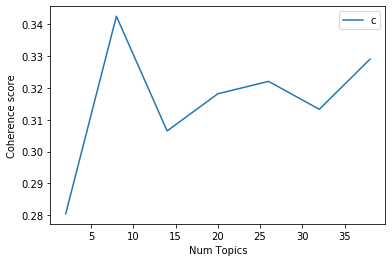

In [32]:
# Show graph
 
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [34]:
print(lda_train.log_perplexity(train_corpus))

-7.20155552102239


In [0]:
#Printing 10 words for eac 20 topics
lda_train.print_topics(num_topics=20, num_words=10)

[(25,
  '0.031*"sa" + 0.017*"tabl" + 0.014*"qlikview" + 0.013*"set" + 0.013*"valu" + 0.013*"variabl" + 0.012*"let" + 0.012*"function" + 0.011*"sale" + 0.010*"code"'),
 (14,
  '0.012*"project" + 0.010*"nlp" + 0.009*"deep_learn" + 0.009*"research" + 0.008*"field" + 0.007*"ai" + 0.007*"check" + 0.007*"techniqu" + 0.006*"pranav_dar" + 0.006*"comput_vision"'),
 (11,
  '0.028*"train" + 0.018*"input" + 0.016*"neural_network" + 0.015*"network" + 0.015*"layer" + 0.013*"output" + 0.011*"deep_learn" + 0.011*"weight" + 0.010*"function" + 0.009*"let"'),
 (6,
  '0.023*"busi" + 0.020*"manag" + 0.014*"market" + 0.013*"analyst" + 0.013*"team" + 0.011*"custom" + 0.010*"compani" + 0.009*"client" + 0.009*"solut" + 0.008*"busi_intellig"'),
 (13,
  '0.015*"custom" + 0.011*"busi" + 0.008*"project" + 0.007*"exampl" + 0.007*"product" + 0.006*"number" + 0.005*"level" + 0.005*"might" + 0.005*"effect" + 0.005*"solut"'),
 (19,
  '0.021*"system" + 0.018*"audio" + 0.016*"detect" + 0.015*"secur" + 0.013*"music" + 0.0

# Using Unsupervised model to make superised model

Extracted topics will be using like independent variables and given tags in which we have to classify as dependent variable.

In [35]:
# Making training dataset for ANN classifier by taking 20 topic of maximum probability for eac content

train_vecs = []
for i in range(len(rev_train)):
    top_topics = lda_train.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec)

In [37]:
# Taking topic extracted by LDA as dependent variable and the tags in wich we have to classify as independent variable
X = np.array(train_vecs)
target = pd.read_csv('cols.csv')    # contains 4746 columns (one hot encoded technique) corresponding to each entry.
y = np.array(target)

### ANN Model

In [38]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 2483, init = 'uniform', activation = 'relu', input_dim = 20))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 1024, init = 'uniform', activation = 'relu'))
# Adding the third hidden layer
classifier.add(Dense(output_dim = 512, init = 'uniform', activation = 'relu'))
# Adding the fourth hidden layer
classifier.add(Dense(output_dim = 2483, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 4947, init = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


C:\Users\karti\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=2483, kernel_initializer="uniform")`
  
C:\Users\karti\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\karti\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\karti\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2483, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\karti\Anaconda3\envs\tf-gpu

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [39]:
#Model architecture
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2483)              52143     
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2543616   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 2483)              1273779   
_________________________________________________________________
dense_5 (Dense)              (None, 4947)              12288348  
Total params: 16,682,686
Trainable params: 16,682,686
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Splitting the data into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
# Fitting the model
model = classifier.fit(X_train, y_train,validation_data= (X_test,y_test),batch_size = 64, nb_epoch = 100,verbose=1)

C:\Users\karti\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1683 samples, validate on 421 samples
Epoch 1/100
1683/1683 [==============================] - 1s 789us/step - loss: 0.0108 - acc: 0.9971 - val_loss: 0.0235 - val_acc: 0.9972
Epoch 2/100
1683/1683 [==============================] - 1s 615us/step - loss: 0.0107 - acc: 0.9971 - val_loss: 0.0234 - val_acc: 0.9972
Epoch 3/100
1683/1683 [==============================] - 1s 615us/step - loss: 0.0108 - acc: 0.9971 - val_loss: 0.0236 - val_acc: 0.9972
Epoch 4/100
1683/1683 [==============================] - 1s 615us/step - loss: 0.0107 - acc: 0.9971 - val_loss: 0.0236 - val_acc: 0.9972
Epoch 5/100
1683/1683 [==============================] - 1s 616us/step - loss: 0.0108 - acc: 0.9971 - val_loss: 0.0235 - val_acc: 0.9972
Epoch 6/100
1683/1683 [==============================] - 1s 614us/step - loss: 0.0107 - acc: 0.9971 - val_loss: 0.0235 - val_acc: 0.9972
Epoch 7/100
1683/1683 [==============================] - 1s 616us/step - loss: 0.0107 - acc: 0.9971 - val_loss: 0.0236 - val_acc: 0

1683/1683 [==============================] - 1s 613us/step - loss: 0.0101 - acc: 0.9971 - val_loss: 0.0244 - val_acc: 0.9972
Epoch 61/100
1683/1683 [==============================] - 1s 618us/step - loss: 0.0101 - acc: 0.9971 - val_loss: 0.0243 - val_acc: 0.9972
Epoch 62/100
1683/1683 [==============================] - 1s 614us/step - loss: 0.0100 - acc: 0.9971 - val_loss: 0.0244 - val_acc: 0.9972
Epoch 63/100
1683/1683 [==============================] - 1s 616us/step - loss: 0.0100 - acc: 0.9971 - val_loss: 0.0244 - val_acc: 0.9972
Epoch 64/100
1683/1683 [==============================] - 1s 615us/step - loss: 0.0101 - acc: 0.9971 - val_loss: 0.0245 - val_acc: 0.9972
Epoch 65/100
1683/1683 [==============================] - 1s 614us/step - loss: 0.0100 - acc: 0.9971 - val_loss: 0.0244 - val_acc: 0.9972
Epoch 66/100
1683/1683 [==============================] - 1s 615us/step - loss: 0.0100 - acc: 0.9971 - val_loss: 0.0245 - val_acc: 0.9972
Epoch 67/100
1683/1683 [=======================

In [0]:
# To save architeture and weights of the model
model_json = classifier.to_json()
with open("tag_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("tag_model.h5")

In [42]:
# From here testing on AV missing tags!!
 
rev_train = pd.read_csv('AV_predictions.csv',header = None)

In [43]:
#Dropping missing values
rev_train.dropna(inplace = True)

In [44]:
# Extractiong top 20 topis of test data using LDA
train_vecs = []
for i in range(len(rev_train)):
    top_topics = lda_train.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec)

In [45]:
X = np.array(train_vecs)

In [47]:
y_pred = classifier.predict(X)

In [48]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('AV_results_predicted.csv',index = False)

In [49]:
print(y_pred[0])

0      2.133940e-02
1      5.166511e-04
2      2.662220e-19
3      2.120677e-07
4      4.921132e-05
           ...     
929    2.987267e-08
930    1.316286e-06
931    1.176708e-09
932    2.196172e-08
933    3.636743e-04
Name: 0, Length: 934, dtype: float32
